In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
%matplotlib inline

from nsmod.one_component_model_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

#%aimport nsmod.File_Functions
figsize = (4.5, 3.5)
plt.style.use("thesis")

# B1828-11

In [2]:
# Standard values
R = 1e6
c = 3e10
I0 = 1e45

# B1828-11 Values
tauP = 1009 * 86400 # Precession period
nu0 = 2.469 
B0 = 5e12
a0 = 2
chi0 = 49.99

# Derived values
omega0 = 2 * np.pi * nu0
epsI3 = 1.0/(nu0 * tauP) 
epsA = B0**2 * R**5 / (4 * I0 * c**2)

# Simulation values
T = 3000 * 86400
n = 500000
error = 1e-12

print "True values for B1828-11"
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=True, DryRun=True, 
                 )

File_Functions.PrintParameterDictionary(file_name)
print

True values for B1828-11
BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 4.9983997439e+12
DeltaPhi_49 : 2.9919947833e-02
DeltaPhi_49_SpindownTorque : 2.7112716553e-06
DeltaPhi_63 : 3.8857384441e+00
DeltaPhi_75 : 4.1251474991e-02
EMtorqueAmplificationfactor : 4.0800229392e+02
P : 4.0536679401e-01
T : 2.5900000000e+08
a0 : 2.0000000000e+00
beta : -4.2098312478e-02
beta30 : -3.7055591595e-02
beta75 : -2.1350502780e-02
chi0 : 4.9990000000e+01
delta_omega_dot0_EM : 9.1403364647e-14
delta_omega_dot0_FP : 1.5221032976e-16
delta_omega_dot0_FP_EM : 1.9767732659e-14
epsA : 6.9400000000e-12
epsI1 : 0.0000000000e+00
epsI3 : 4.6500000000e-09
n : 5.0000000000e+05
nu_dot0 : -5.3621985156e-14
omega0 : 1.5500000000e+01
omega_dot0 : -3.3691686927e-13
source_script : one-component-model-with-Euler
tauA : 5.8410200866e+10
tauE : 4.6005413838e+13
tauP : 8.7228792049e+07
tauS : 2.6989177340e+13
theta0 : 3.4906584878e-02
wobble_angle : 3.5644569225e-02
wobble_angle_spindown : 3

## Old pulsar TR dominated by precession

Old pulsar: TR dominate by precession
BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.5806327847e+14
DeltaPhi_49 : 2.9919947845e-02
DeltaPhi_49_SpindownTorque : 2.7112842501e-06
DeltaPhi_63 : 3.8857384017e-03
DeltaPhi_75 : 4.1251474558e-05
EMtorqueAmplificationfactor : 4.0800228930e-01
P : 4.0536679401e-01
T : 4.5300000000e+05
a0 : 2.0000000000e+00
beta : -4.2098312476e-02
beta30 : -3.7055591592e-02
beta75 : -2.1350502785e-02
chi0 : 4.9990000000e+01
delta_omega_dot0_EM : 9.1403364647e-11
delta_omega_dot0_FP : 1.5221032976e-10
delta_omega_dot0_FP_EM : 1.9767732435e-11
epsA : 6.9400000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 4.6500000000e-06
n : 5.0000000000e+05
nu_dot0 : -5.3621985156e-11
omega0 : 1.5500000000e+01
omega_dot0 : -3.3691686927e-10
source_script : one-component-model-with-Euler
tauA : 5.8410200866e+07
tauE : 4.6005413838e+10
tauP : 8.7228791555e+04
tauS : 2.6989177340e+10
theta0 : 3.4906422725e-02
wobble_angle : 3.5644569240e-02
wobble_angle

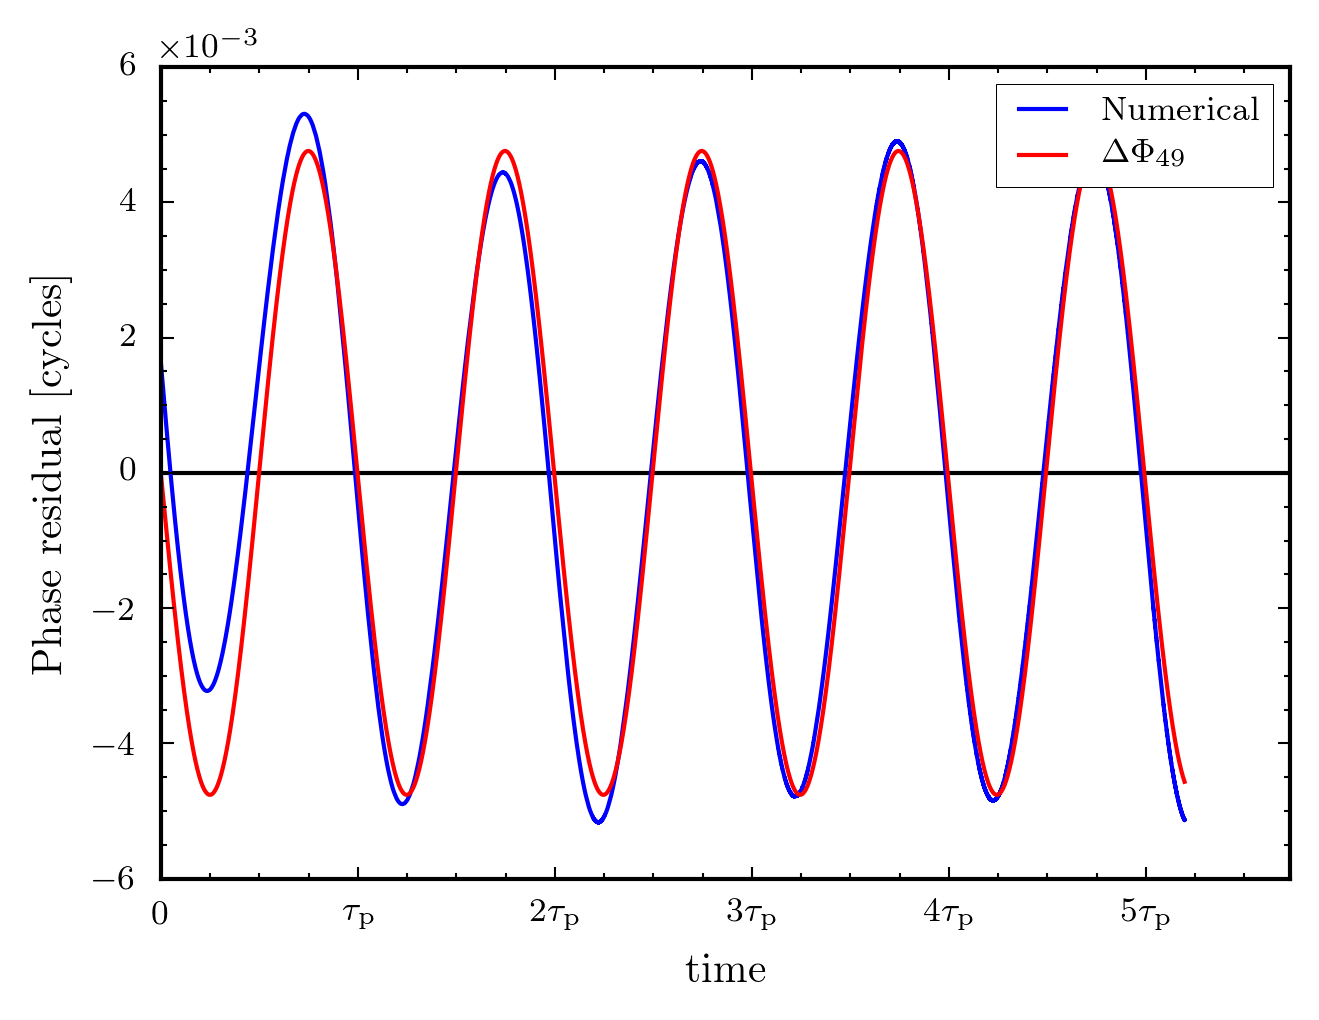

BETA FUNCTION IS USED
BETA FUNCTION IS USED


In [3]:
# Manual changes
new_epsI3 = epsI3 * 1e3
new_epsA = epsA * 1e3
new_omega0 = omega0 * 1
new_tauP = 2 * np.pi/(new_epsI3 * new_omega0)
new_T = 5.2 * new_tauP

print "Old pulsar: TR dominate by precession"
file_name = main(chi0=chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 )

File_Functions.PrintParameterDictionary(file_name)


fig, ax1 = plt.subplots(figsize=figsize)
ax1 = Plot.PhaseResidual(file_name, ax=ax1, analytic="49", order=3)
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig("img/49_verification.pdf")
plt.show()

File_Functions.PropertiesTable(file_name, "49_verification")

## Yound pulsar: TR amplified by torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.5806327847e+14
DeltaPhi_49 : 3.0188364986e-02
DeltaPhi_49_SpindownTorque : 2.7112842501e-04
DeltaPhi_63 : 3.9205980478e-01
DeltaPhi_75 : 4.1994943099e-03
EMtorqueAmplificationfactor : 4.0800228930e+01
P : 4.0536679401e-03
T : 4.5300000000e+03
a0 : 2.0000000000e+00
beta : -4.2098312476e-02
beta30 : -3.7055591592e-02
beta75 : -2.1350502785e-02
chi0 : 4.9990000000e+01
delta_omega_dot0_EM : 9.1403364647e-05
delta_omega_dot0_FP : 1.5221032976e-06
delta_omega_dot0_FP_EM : 1.9767732435e-05
epsA : 6.9400000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 4.6500000000e-06
n : 5.0000000000e+05
nu_dot0 : -5.3621985156e-05
omega0 : 1.5500000000e+03
omega_dot0 : -3.3691686927e-04
source_script : one-component-model-with-Euler
tauA : 5.8410200866e+05
tauE : 4.6005413838e+06
tauP : 8.7228791555e+02
tauS : 2.6989177340e+06
theta0 : 3.4906422725e-02
wobble_angle : 3.5964342971e-02
wobble_angle_spindown : 3.2300376886e-04
./data/on

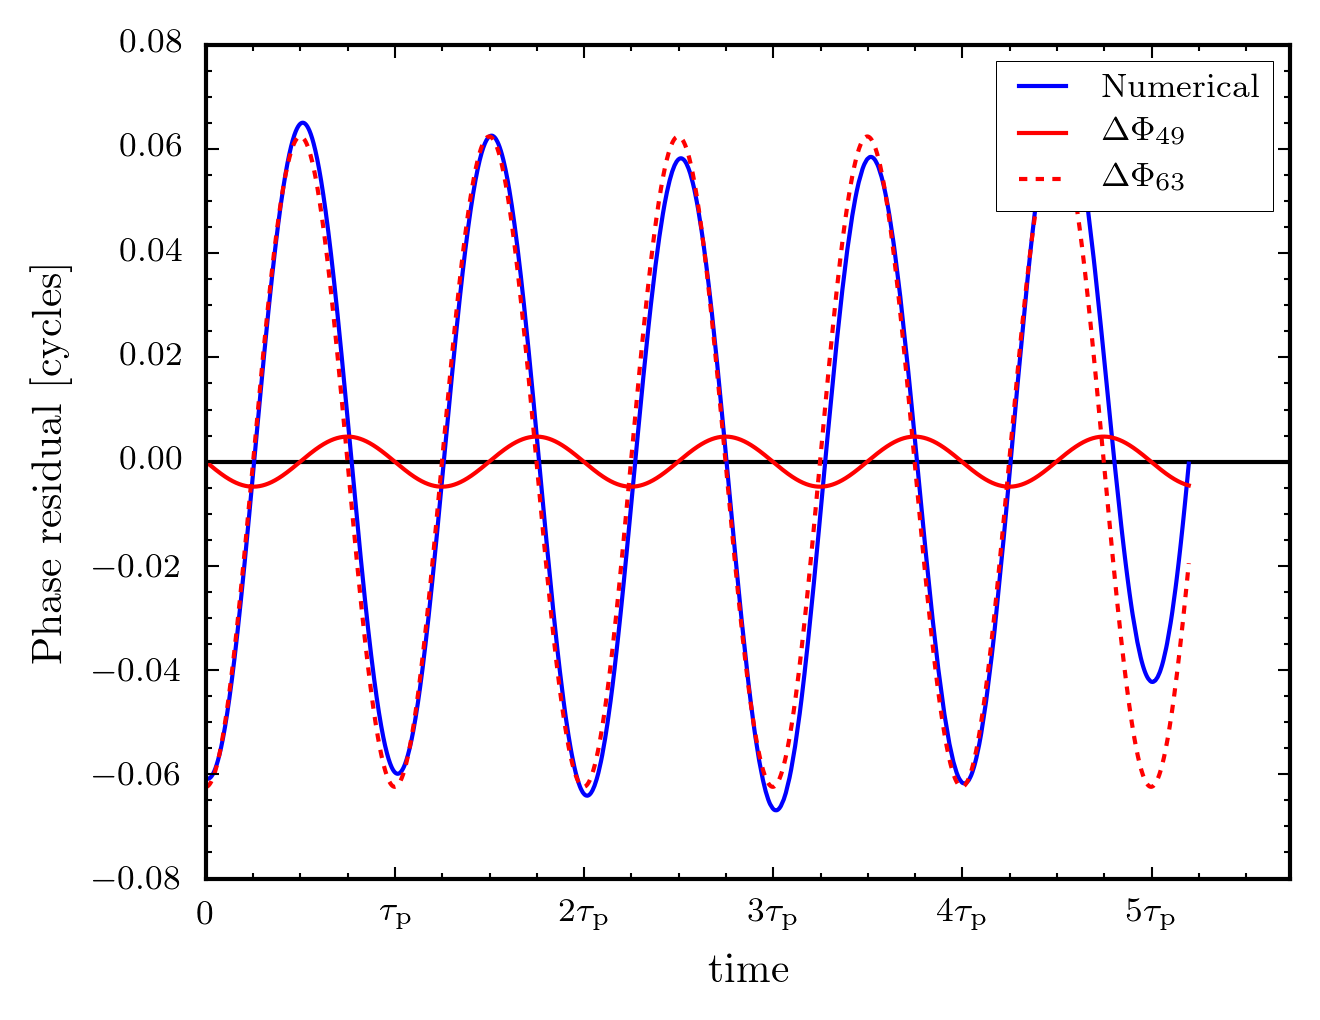

BETA FUNCTION IS USED
BETA FUNCTION IS USED


In [4]:
# Manual changes
new_epsI3 = epsI3 * 1e3
new_epsA = epsA * 1e3
new_omega0 = omega0 * 1e2
new_tauP = 2 * np.pi/(new_epsI3 * new_omega0)
new_T = 5.2 * new_tauP

file_name = main(chi0=chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 )

File_Functions.PrintParameterDictionary(file_name)


fig, ax1 = plt.subplots(figsize=figsize)
ax1 = Plot.PhaseResidual(file_name, ax=ax1, analytic=['49', "63"])
plt.legend()
plt.tight_layout()
plt.savefig("img/63_verification.pdf")
plt.show()

File_Functions.PropertiesTable(file_name, "63_verification")

## Young pulsar with chi close to $\pi/2$

Like B1828-11 in Jones 2001

Old pulsar: TR dominate by precession
BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.5806327847e+14
DeltaPhi_49 : 6.4310063281e-06
DeltaPhi_49_SpindownTorque : 3.3861246756e-07
DeltaPhi_63 : 8.5512367101e-04
DeltaPhi_75 : 4.5132888590e-02
EMtorqueAmplificationfactor : 4.1773403814e+02
P : 6.7488563987e-04
T : 7.5600000000e+02
a0 : 2.0000000000e+00
beta : -1.4904899313e-05
beta30 : -3.7055591592e-02
beta75 : -2.1350502785e-02
chi0 : 8.9990000000e+01
delta_omega_dot0_EM : 1.9806882775e-02
delta_omega_dot0_FP : 1.1417999062e-08
delta_omega_dot0_FP_EM : 1.5182384802e-06
epsA : 6.9400000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 4.6500000000e-06
n : 5.0000000000e+05
nu_dot0 : -1.9806882172e-02
omega0 : 9.3100000000e+03
omega_dot0 : -1.2445031104e-01
source_script : one-component-model-with-Euler
tauA : 9.7245769434e+04
tauE : 7.4808973332e+04
tauP : 1.4522516317e+02
tauS : 7.4808971053e+04
theta0 : 3.4906422725e-02
wobble_angle : 3.6846951688e-02
wobble_angle

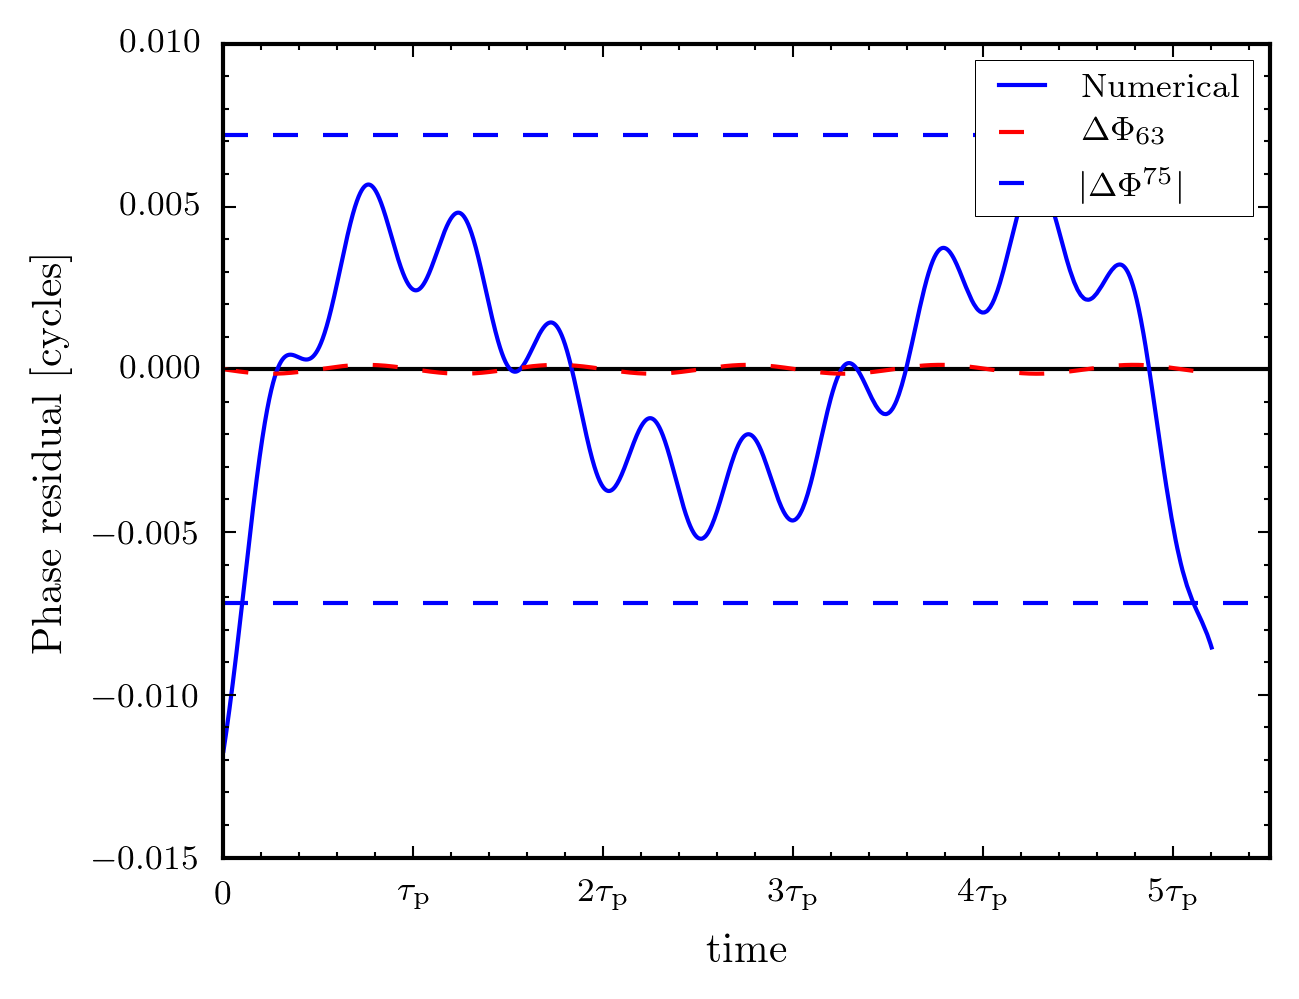

BETA FUNCTION IS USED
BETA FUNCTION IS USED


In [6]:
# Manual changes
new_chi0 = 89.99
new_epsI3 = epsI3 * 1e3
new_epsA = epsA * 1e3
new_omega0 = omega0 * 6e2
new_tauP = 2 * np.pi/(new_epsI3 * new_omega0)
new_T = 5.2 * new_tauP

print "Old pulsar: TR dominate by precession"
file_name = main(chi0=new_chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 )

File_Functions.PrintParameterDictionary(file_name)

fig, ax1 = plt.subplots(figsize=figsize)
ax1 = plt.subplot(111)
ax1 = Plot.PhaseResidual(file_name, ax=ax1, order=3, analytic=['63', '75'])
plt.legend()
plt.savefig("img/75_verification.pdf")
plt.show()

File_Functions.PropertiesTable(file_name, "75_verification")